In [2]:
# Importss
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit # The module that contains the curve_fit routine

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.rawData_queries import *
from myLibraries.events import *
from myLibraries.theoretical_functions import *

# **infos of authors who started in 2017**

In [ ]:
# Authors who started in 2017 ordered number of collaborations
df = get_collabs_by_hole_size(28, 2017)
print(df.sort_values('2018', ascending=False).head(20))

In [ ]:
# Distribution on collaboration 
plt.figure(figsize=(25, 10), dpi=80)
plt.title("distribution for authors who started in 2017")
x = list(set(list(df["2018"]))) # number of collaboration 
y =  []
for i in x:
    y.append(len(df[df["2018"]==i])) # number of authors for the given number of collaboration

plt.plot(x,y)
plt.show()

print("#collabs", "\t#authors_associated")
print("--------", "\t", "---------")

for i,j in zip(x,y):
    print(i,"\t\t", j)
    
print("\nThe average number of collaborations in 2017 is ", np.average(df["2017"], axis=0))

In [ ]:
# names
names_df = get_COMP_names_by_start_year(2017)
names_df

# **ending year distribution** (deaths)

In [ ]:
# all
YEARS = get_int_years_event()
plt.figure(figsize=(25, 10), dpi=80)
plt.title("ending year distribution for whole data")
plt.ylabel("#authors")
plt.xlabel("#ending year")

data = get_all_collabs()
data = data[data.start_year.isin([1990, 1991, 1992])]
dist = {}

for y in YEARS:
    dist[y] = len(data[data["end_year"] == y])
    plt.scatter(y, dist[y], label=str(y)+' - '+str(dist[y]))

plt.xticks(rotation='vertical')    
plt.legend(loc='upper center', ncol=2)
plt.xticks(YEARS)
plt.show()
print("whole data", dist)
    
# same for hole size 1-2-3
df =  get_all_collabs()
df["max_hole_size"] = get_all_collabs()["max_hole_size"]
df["activity"] = get_all_collabs()["activity"]

df = df[df.start_year.isin([1990, 1991, 1992])] # take all authors that started in the given years

activity = 3
for hs in [0,1,2,3]:
    plt.figure(figsize=(25, 10), dpi=80)
    plt.title("ending year distribution for authors with max hole size <= " + str(hs) + " and active for at least " + str(activity) + " consecutive years" )
    plt.ylabel("#authors")
    plt.xlabel("#ending year")
    data = df[df["max_hole_size"] <= hs] # filter data by hole size
    data = data[data["activity"] >= activity] # filter data by hole size
    
    # compute the distribution 
    dist = {}
    for y in YEARS:
        dist[y] = len(data[data["end_year"] == y])
        plt.scatter(y, dist[y], label=str(y)+' - '+str(dist[y]))

    plt.xticks(rotation='vertical')    
    plt.xticks(YEARS)
    plt.legend(ncol=2)
    plt.show()
    print("hole size", hs, dist) 

# Starting collaboration year VS starting publication year

get those authgors who have started collaborations before publications 

In [ ]:
## Find the starting collaboration year for each author
def get_start_Y(aut):
    YEARS = [str(year) for year in range(1990,2019)]    
    for y in YEARS:
        val = aut[y].values[0]
        if(val != 0):
            return y
        
# add starting year to each row of df, taking the start year from the collaboration or publication dataset
def add_start_collab_y(df, coll_or_pub_df):
    df["start_year"] = [0 for i in range(len(df))]
    i = 0
    for id in df["ID"]:
        
        if(i%500 == 0):
            print("done", i, "on", len(df), end='\r')
        i+=1
        
        aut = df.loc[df["ID"] == id]
        df.loc[df.ID == id, "start_year"] = get_start_Y(coll_or_pub_df.loc[coll_or_pub_df["ID"] == id])
    return df

collab_df = get_all_collabs()
df = add_start_collab_y(collab_df, collab_df)

In [ ]:
#
YEARS = [str(year) for year in range(1990,2019)]   
collab_years = df[["start_year"]]

In [ ]:
#
data = get_starting_years() # starting publication years
data["start_coll_year"] = collab_years
data["start_coll_year"] = data["start_coll_year"].fillna(100000) # big number for fun
data["start_coll_year"] = data["start_coll_year"].astype(int)
data = pd.merge(data, get_all_COMP_names())
data

In [ ]:
#
ahmed_samets_idxs = np.where((data['start_year'] > data['start_coll_year']))[0]
ahmed_samets_idxs

In [ ]:
#
data[data.index.isin(ahmed_samets_idxs)]

# **re-Build starting and ending year data**

In [ ]:
#
YEARS = get_str_years_event()
df = get_all_COMP_names()
names = df["ID"]

# initialize all empty columns 
df["start_year"] = 0
df["end_year"] = 0
df.astype({"start_year": 'int64'}).dtypes
df.astype({"end_year": 'int64'}).dtypes

seen = 0

start_years = [] 
end_years = []
for authID in names:
    start, end = get_COMP_start_and_end_year_by_authID(authID)
    
    start_years.append(start)    
    
    end_years.append(end)

    seen += 1    
    sys.stdout.write('\r'+ " done " + str(seen) + " on " + str(len(names)))

df["start_year"] = start_years
df["end_year"] = end_years

# df.to_csv("myDATA/tmp.csv", index=0)
df

In [ ]:
#
start_y = pd.read_csv("../myDATA/tmp.csv")["start_year"]
end_y = pd.read_csv("../myDATA/tmp.csv")["end_year"]

# Get maximum hole size and maximum number of consecutive years of actovity for each author

In [ ]:
#
YEARS = get_str_years_event()
df = get_all_COMP_names()

# initialize all empty columns 
df["max_hole"] = 0
df.astype({"max_hole": 'int64'}).dtypes

df["activity"] = 0
df.astype({"activity": 'int64'}).dtypes

names = df["ID"]

df

In [ ]:
#
max_holes = [] 
max_pubs = []

seen = 0
for authID in names:
    
    max_hole = get_COMP_max_hole_size_by_authID(authID)
    max_holes.append(max_hole)
    
    max_pub = get_COMP_max_consecutive_pubs_num_by_authID(authID)
    max_pubs.append(max_pub)

    seen += 1
    
    sys.stdout.write('\r\r'+ " done " + str(seen) + " on " + str(len(names)))

# Change activity definition to -> start_year - ending_year

In [ ]:
df = get_all_collabs()
df["activity"] = abs(df["start_year"] - df["end_year"])
#df.to_csv("../myDATA/00-collaboration_df.csv", index=0)
df

# Activity and hole sizes

the avg maximum activity period is 2.785915529252098

activity 	 #authors
0 		 137502
1 		 14932
2 		 14252
3 		 9588
4 		 8223
5 		 5957
6 		 5369
7 		 4254
8 		 4244
9 		 3469
10 		 3370
11 		 2763
12 		 2650
13 		 2099
14 		 2017
15 		 1765
16 		 1644
17 		 1305
18 		 1216
19 		 1020
20 		 1041
21 		 814
22 		 793
23 		 616
24 		 556
25 		 503
26 		 354
27 		 292


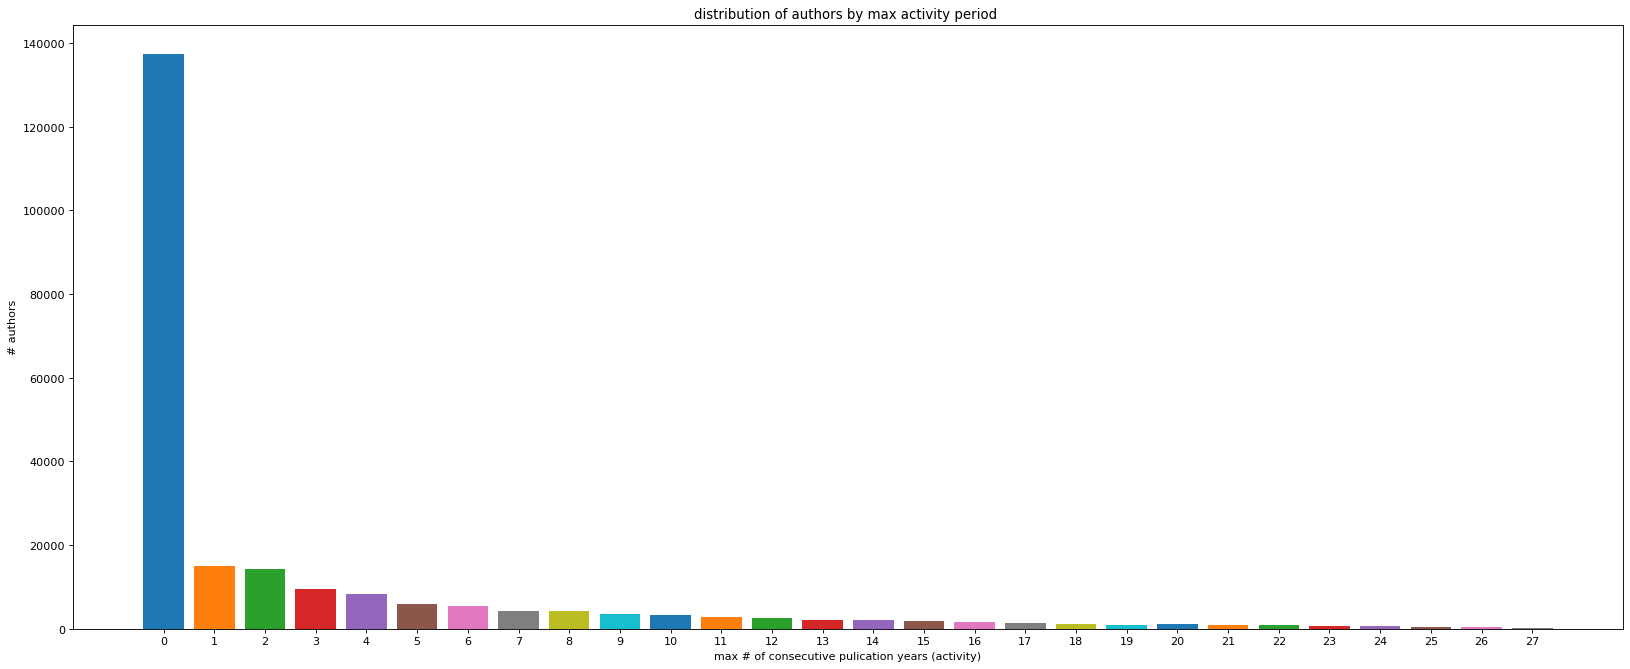

In [2]:
# distribution of authors by max activity
# how many authors have the given max activity period?

df = get_all_collabs()

print("the avg maximum activity period is", np.average(df["activity"]))
print()

plt.figure(figsize=(25, 10), dpi=80)
plt.title("distribution of authors by max activity period ")
plt.ylabel("# authors")
plt.xlabel("max # of consecutive pulication years (activity)")

print("activity \t #authors")
for activity in range( 28):
    print(activity, "\t\t", len(df[df["end_year"] - df["start_year"]==activity]))
    plt.bar(activity, len(df[df["end_year"] - df["start_year"]==activity]))
    plt.xticks([i for i in range(28)])
plt.show()

# Choose activity, max hole to define actives based on which bring suitable #publications and #authors

- activity >= 5
- Max hole <= 7

In [3]:
activity  = 5
hole_size  = 7
df = get_all_collabs_by_hole_size(hole_size, activity)
df[df["tot_pubs"]==2]

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
216,6503981598,0,0,0,0,0,0,0,0,0,...,34,34,34,34,34,2002,2009,6,7,2
339,6504054900,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,2007,2012,4,5,2
420,6504104862,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,2002,2008,5,6,2
448,6504127343,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,2002,2008,5,6,2
572,6504203999,0,0,0,0,0,0,0,1,1,...,1,1,1,1,1,1991,1997,5,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231164,57205269564,0,0,0,0,0,0,0,0,0,...,2,2,9,9,9,2009,2016,6,7,2
231190,57205296035,0,0,0,0,0,0,0,0,0,...,4,4,9,9,9,2009,2016,6,7,2
231496,57205523552,0,0,0,0,0,0,0,0,0,...,39,39,39,39,39,2002,2009,6,7,2
232156,57206380072,0,0,0,0,0,0,0,0,0,...,1,1,5,5,5,2009,2016,6,7,2


In [4]:

print("how many authors with hole size <=", hole_size, "and activity >=", activity, "have '>= minPubs' and '== minPubs' number of publications?")
#print('minPubs \t #authors with #pubs  >= minPubs \t #authors with #pubs minPubs')

authors_dist = []
authors_ge_dist = []
for minPubs in range(482):
    
    authors_dist.append(len(df[df["tot_pubs"] == minPubs]))
 
    authors_ge_dist.append(len(df[df["tot_pubs"] >= minPubs]))

    #print(minPubs, "\t\t", authors_ge_dist[-1], "\t\t\t\t\t", authors_dist[-1])

dist_df = pd.DataFrame()
dist_df["#pubs"] = [minPubs for minPubs in range(482)]
dist_df["#authors_eq"] = authors_dist
dist_df["#authors_ge"] = authors_ge_dist
dist_df


how many authors with hole size <= 7 and activity >= 5 have '>= minPubs' and '== minPubs' number of publications?


,#pubs,#authors_eq,#authors_ge
0,0,0,40556
1,1,0,40556
2,2,3761,40556
3,3,4575,36795
4,4,4130,32220
...,...,...,...
477,477,0,1
478,478,0,1
479,479,0,1
480,480,0,1


In [5]:
dist_df.sort_values(by="#authors_eq",  ascending=False)

,#pubs,#authors_eq,#authors_ge
3,3,4575,36795
4,4,4130,32220
2,2,3761,40556
5,5,3582,28090
6,6,2896,24508
...,...,...,...
295,295,0,9
296,296,0,9
297,297,0,9
298,298,0,9


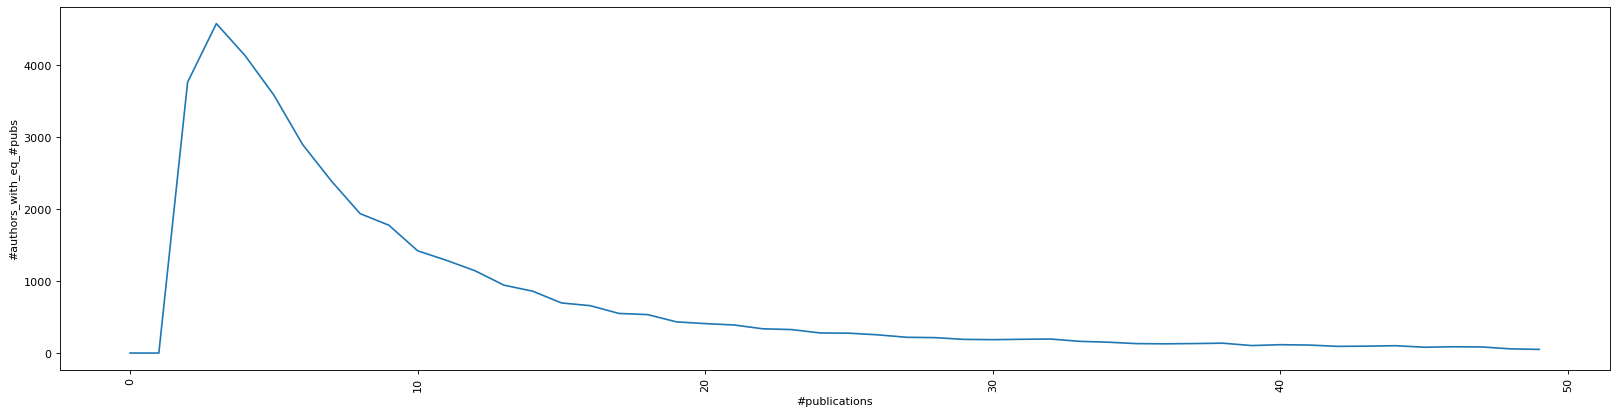

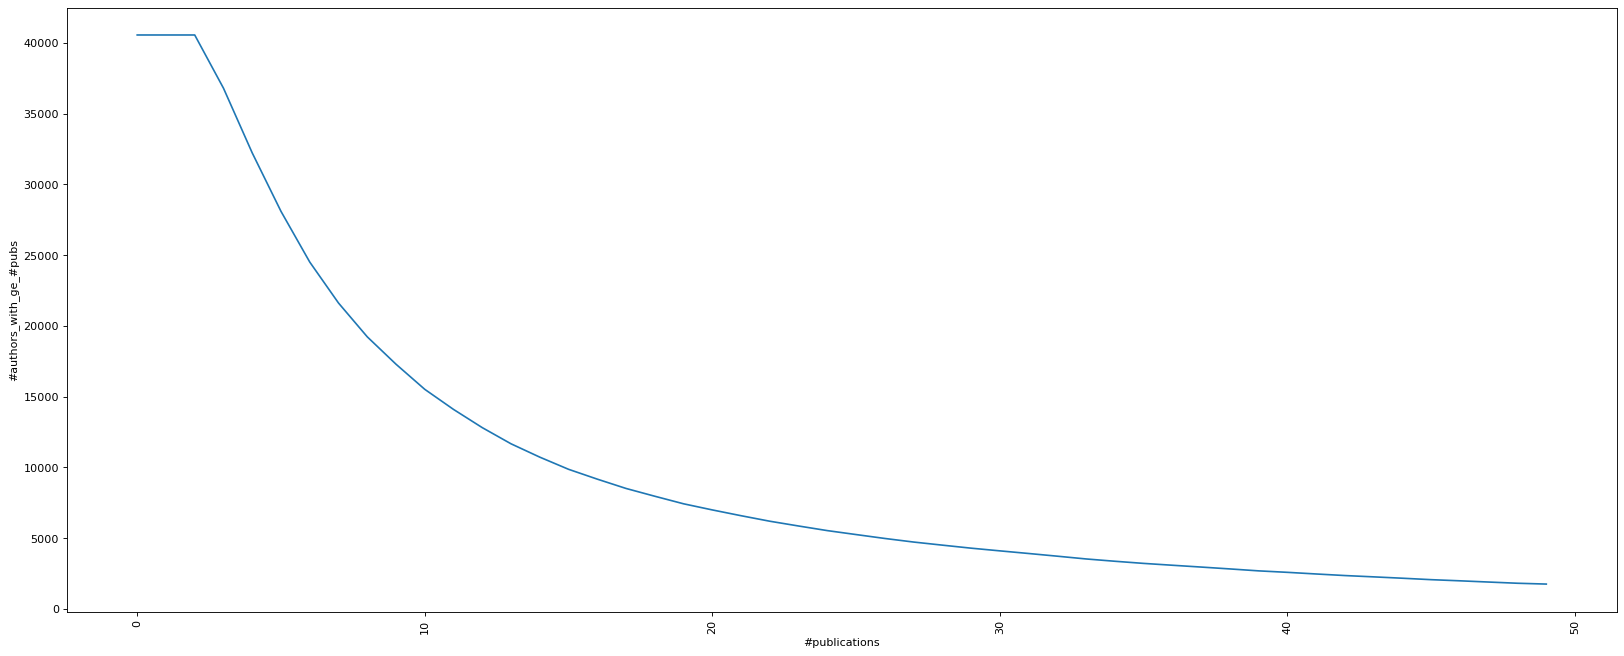

In [6]:
plt.figure(figsize=(25, 6), dpi=80)
plt.xlabel("#publications")
plt.ylabel("#authors_with_eq_#pubs")
plt.xticks(rotation='vertical')
plt.plot([minPubs for minPubs in range(50)], authors_dist[:50])
plt.show()

plt.figure(figsize=(25, 10), dpi=80)
plt.xlabel("#publications")
plt.ylabel("#authors_with_ge_#pubs")
plt.xticks(rotation='vertical')
plt.plot([minPubs for minPubs in range(50)], authors_ge_dist[:50])
plt.show()

In [9]:
activity  = 5
hole_size  = 7
minPubs = 3
df = get_all_collabs_by_hole_size(hole_size, activity, minPubs)
print("%.2f" % (len(df)/len(get_all_collabs())*100) + "% on the total #authors")
df

15.80% on the total #authors


,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
6,6503847168,0,0,0,0,0,0,0,0,0,...,12,12,15,16,21,2004,2018,4,14,14
8,6503849838,0,0,0,0,0,0,0,0,0,...,13,13,13,32,32,2006,2017,7,11,4
20,6503858724,0,0,0,0,0,0,0,0,0,...,16,16,16,16,16,1999,2013,7,14,5
31,6503866265,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,2002,2012,6,10,3
70,6503889335,0,0,0,0,0,0,0,0,0,...,16,20,20,25,25,2004,2018,3,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232590,57207536959,0,0,0,0,0,0,0,0,0,...,30,30,46,46,47,2009,2018,4,9,16
232623,57207585229,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,2009,2016,6,7,4
232638,57207598135,0,0,0,0,0,0,0,0,0,...,11,11,25,25,27,2009,2018,6,9,6
232647,57207604191,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,2009,2016,4,7,11


In [11]:
# TRY

activity  = 5
hole_size  = 11
minPubs = 3
df = get_all_collabs_by_hole_size(hole_size, activity, minPubs)
print("%.2f" % (len(df)/len(get_all_collabs())*100) + "% on the total #authors")

17.44% on the total #authors


# Broken Powerlaw (ACTIVE)

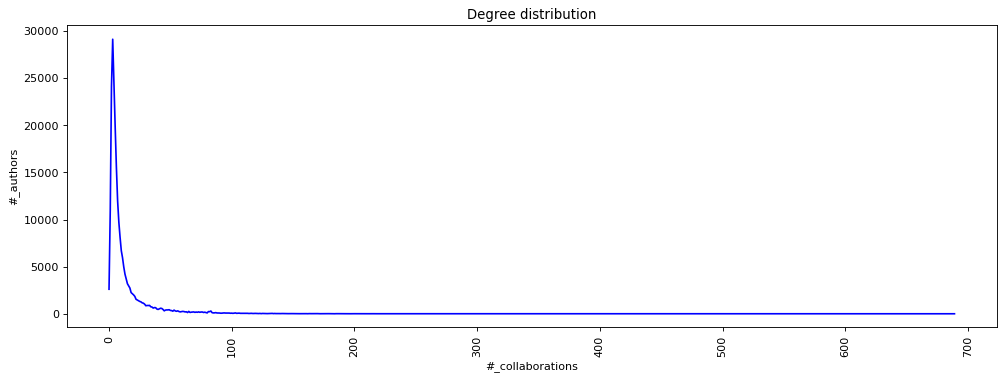

In [2]:
# DD
colls = get_all_collabs()["2018"].values

unique, counts = np.unique(colls, return_counts=True)
    
plt.figure(figsize=(15, 5), dpi=80)
plt.title("Degree distribution")
plt.xlabel("#_collaborations")
plt.ylabel("#_authors")
plt.xticks(rotation=90)

plt.plot(unique, counts, color="blue")
    
plt.show()

c1: 112.31230710014314 , c2: 147008.84822148283 , a1: 11.880339946173773 , a2: 1.3586799344039016 , xc: 0.5055474710590783


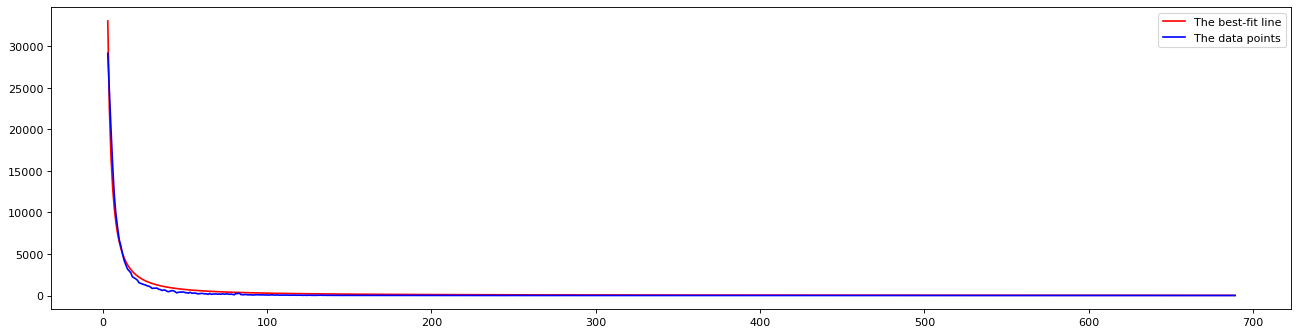

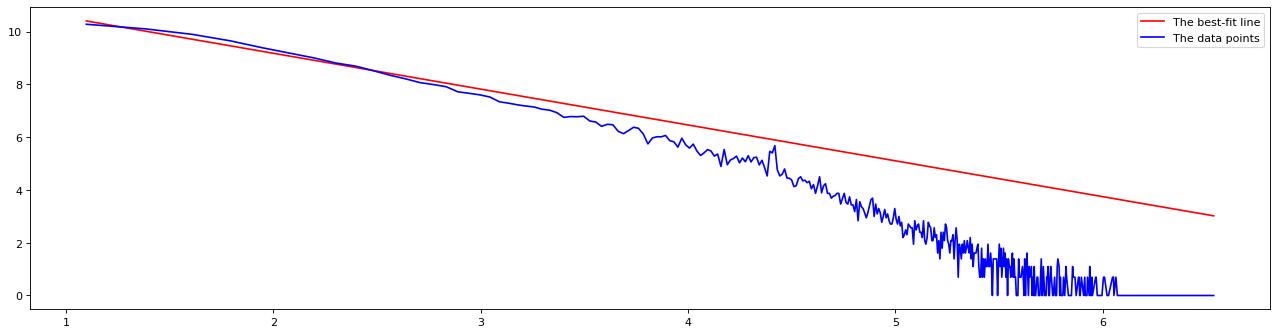

In [5]:
# Broken powerlaw fit
x,y = unique[3:], counts[3:]

dd, c1, c2, a1, a2, xc = fit_broken_powerlaw(x,y)

plt.figure(figsize=(20, 5), dpi=80)
plt.plot(x, dd, 'red', label='The best-fit line')
plt.plot(x,y, c='b',label='The data points')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(20, 5), dpi=80)
plt.plot(np.log(x), np.log(dd), 'red', label='The best-fit line')
plt.plot(np.log(x), np.log(y), c='b',label='The data points')
plt.legend(loc='best')
plt.show()

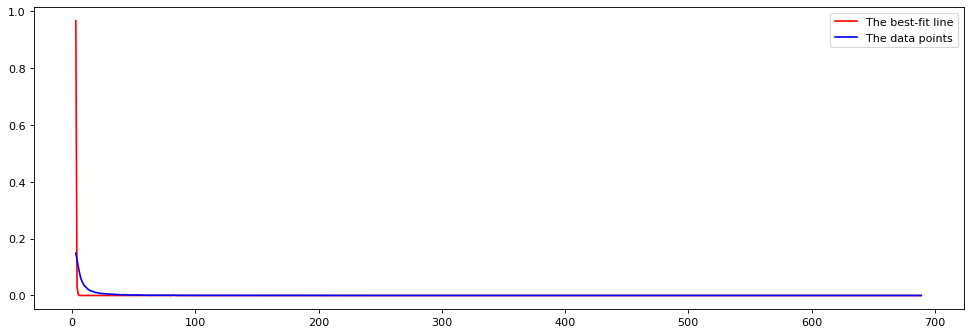

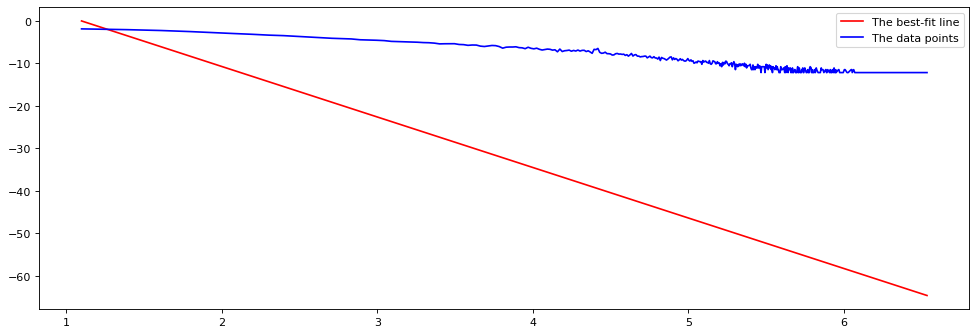

In [22]:
# left broken DD 
dd = l_broken_powerlaw(x, c1, a1, a2, xc)
dd = [a / sum(dd) for a in dd]

plt.figure(figsize=(15, 5), dpi=80)
plt.plot(x, dd, 'red', label='The best-fit line')
plt.plot(x,y, c='b',label='The data points')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15, 5), dpi=80)
plt.plot(np.log(x), np.log(dd), 'red', label='The best-fit line')
plt.plot(np.log(x), np.log(y), c='b',label='The data points')
plt.legend(loc='best')
plt.show()

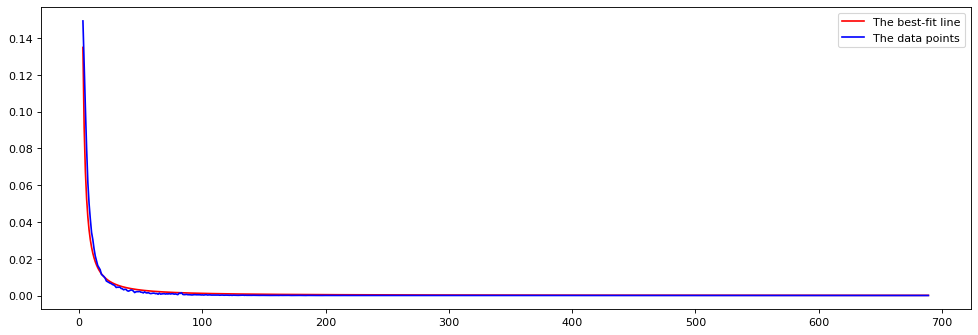

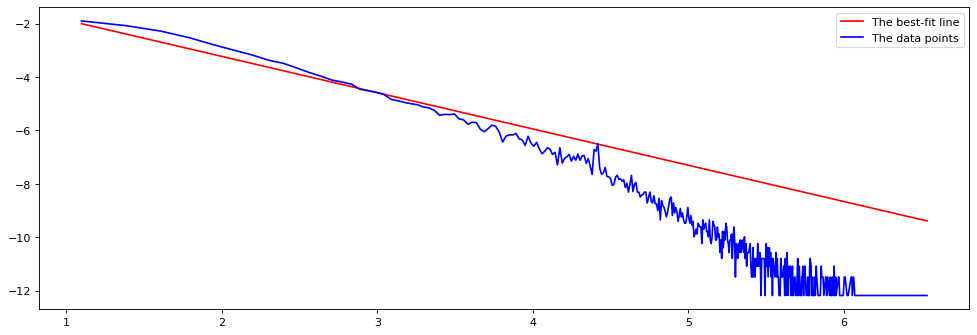

In [21]:
# right broken dd
dd = r_broken_powerlaw(x, c1, a1, a2, xc)
dd = [a / sum(dd) for a in dd]

plt.figure(figsize=(15, 5), dpi=80)
plt.plot(x, dd, 'red', label='The best-fit line')
plt.plot(x,y, c='b',label='The data points')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15, 5), dpi=80)
plt.plot(np.log(x), np.log(dd), 'red', label='The best-fit line')
plt.plot(np.log(x), np.log(y), c='b',label='The data points')
plt.legend(loc='best')
plt.show()

c: 0.7532946827776771 , gamma: 1.3586732744982997


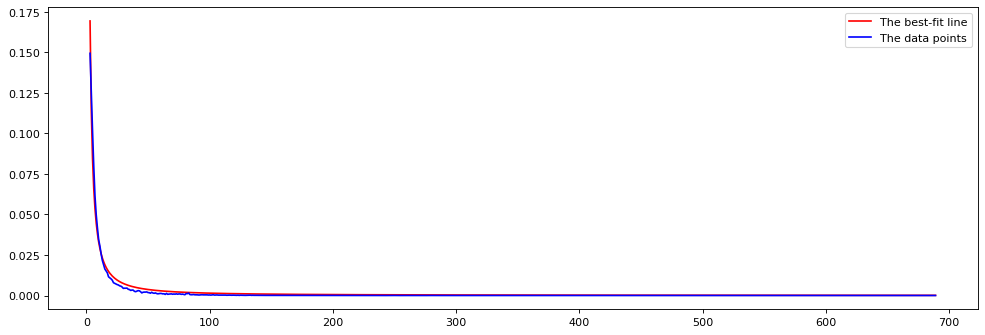

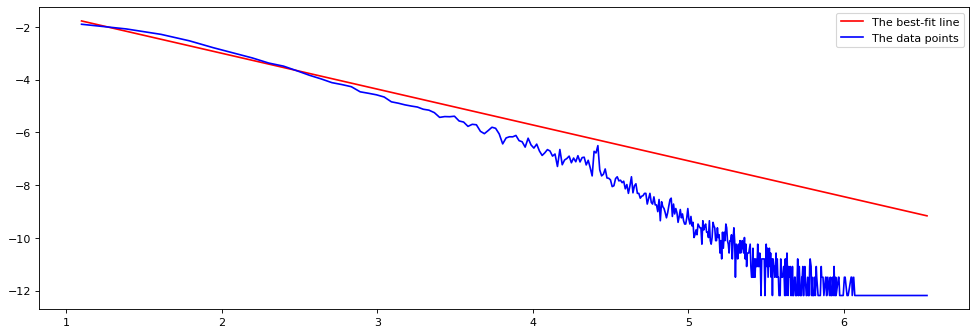

In [14]:
# powerlaw 

x,y = unique[3:], counts[3:]
y = [a / sum(y) for a in y]

dd, c, gamma = fit_powerlaw(x,y)

plt.figure(figsize=(15, 5), dpi=80)
plt.plot(x, dd, 'red', label='The best-fit line')
plt.plot(x,y, c='b',label='The data points')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15, 5), dpi=80)
plt.plot(np.log(x), np.log(dd), 'red', label='The best-fit line')
plt.plot(np.log(x), np.log(y), c='b',label='The data points')
plt.legend(loc='best')
plt.show()

# Check authors foc_con data with < 3y of activity

In [84]:
foc_con = get_all_granting_data() 
foc_con[foc_con["activity"]<=3]

,ID,group,focal,anr_year,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
2,24766427900,1000,1,2012,0,0,0,0,0,0,...,4,4,4,4,4,2013,2013,0,0,1
3,15131147900,1000,0,2005,0,0,0,0,0,0,...,7,7,7,7,7,2011,2011,0,0,1
6,24773509500,1004,1,2013,0,0,0,0,0,0,...,6,6,6,6,6,2006,2009,2,3,2
9,7007064265,1005,0,2010,0,0,0,0,0,0,...,2,2,2,2,2,1996,1996,0,0,2
10,24773749600,1006,1,2014,0,0,0,0,0,0,...,0,0,0,0,5,2018,2018,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,24479411500,963,1,2011,0,0,0,0,0,0,...,0,3,3,6,6,2015,2017,1,2,3
2897,50261943800,963,0,2014,0,0,0,0,0,0,...,10,10,10,10,10,2012,2013,0,1,2
2899,8433665100,969,0,2012,0,0,0,0,0,0,...,33,33,33,33,33,2011,2011,0,0,3
2907,7005280084,992,0,2014,0,0,0,0,0,0,...,3,3,3,3,3,2007,2007,0,0,1


In [85]:
foc_con[foc_con["group"]==1000]

,ID,group,focal,anr_year,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
2,24766427900,1000,1,2012,0,0,0,0,0,0,...,4,4,4,4,4,2013,2013,0,0,1
3,15131147900,1000,0,2005,0,0,0,0,0,0,...,7,7,7,7,7,2011,2011,0,0,1


In [86]:
df = get_all_collabs()
df[df["ID"] == 24766427900]

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
112255,24766427900,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,2013,2013,0,0,1


In [87]:
df[df["ID"] == 15131147900]

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
89497,15131147900,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,2011,2011,0,0,1


<img src="../assets/2022-06-07_17-44.png"> </img>
<img src="../assets/2022-06-07_17-43.png"> </img>
<img src="../assets/2022-06-07_17-47.png"> </img>
<img src="../assets/2022-06-07_17-47_1.png"> </img>

## foc_con with start_y > anr_year

In [7]:
foc_con = get_all_granting_data()
foc_con[foc_con["start_year"] > foc_con["anr_year"]]
368/len(foc_con)

0.12646048109965635

# groups with anr_year(focal) != anr_year(control)

In [89]:
groups = np.unique(get_all_groups())
res_groups = []
left_groups = []

for g in groups:
    grp = foc_con[foc_con["group"] == g]
    foc = grp[grp["focal"] == 1]
    con = grp[grp["focal"] == 0]

    if(foc["anr_year"].values[0] != con["anr_year"].values[0]):
        res_groups.append(g)
    else:
        left_groups.append(g)
        
print("There are", len(res_groups), "/", len(groups), " groups with anr(foc)!=anr(con)")

There are 1302 / 1455  groups with anr(foc)!=anr(con)


In [90]:
res_groups

[6,
 8,
 13,
 14,
 17,
 19,
 25,
 26,
 27,
 32,
 37,
 43,
 44,
 48,
 50,
 53,
 54,
 56,
 61,
 63,
 65,
 67,
 76,
 78,
 95,
 100,
 101,
 123,
 125,
 130,
 140,
 146,
 162,
 164,
 172,
 175,
 179,
 180,
 181,
 187,
 191,
 196,
 205,
 210,
 211,
 213,
 239,
 240,
 243,
 245,
 246,
 253,
 254,
 258,
 262,
 277,
 281,
 283,
 287,
 289,
 291,
 299,
 300,
 304,
 307,
 308,
 318,
 323,
 326,
 328,
 329,
 338,
 351,
 355,
 362,
 372,
 383,
 393,
 397,
 403,
 406,
 409,
 413,
 419,
 424,
 426,
 428,
 431,
 433,
 435,
 436,
 443,
 448,
 451,
 452,
 456,
 460,
 461,
 465,
 472,
 474,
 475,
 480,
 482,
 485,
 501,
 507,
 516,
 523,
 525,
 530,
 542,
 543,
 551,
 552,
 553,
 554,
 563,
 567,
 582,
 588,
 595,
 596,
 601,
 605,
 607,
 608,
 609,
 618,
 625,
 638,
 646,
 650,
 652,
 653,
 655,
 659,
 660,
 662,
 663,
 665,
 672,
 675,
 680,
 683,
 686,
 690,
 692,
 693,
 695,
 703,
 713,
 721,
 722,
 727,
 730,
 731,
 743,
 744,
 745,
 749,
 753,
 754,
 755,
 760,
 761,
 766,
 767,
 772,
 773,
 775,
 

In [91]:
left_groups

[45,
 77,
 117,
 127,
 152,
 178,
 198,
 206,
 217,
 218,
 223,
 270,
 306,
 415,
 417,
 432,
 466,
 483,
 490,
 577,
 606,
 697,
 765,
 776,
 879,
 891,
 969,
 1010,
 1078,
 1170,
 1249,
 1250,
 1256,
 1329,
 1413,
 1414,
 1458,
 1728,
 1973,
 1987,
 1996,
 1998,
 2003,
 2021,
 2050,
 2085,
 2252,
 2265,
 2270,
 2313,
 2357,
 2449,
 2534,
 2598,
 2612,
 2620,
 2626,
 2642,
 2646,
 2685,
 2758,
 2986,
 3006,
 3212,
 3241,
 3306,
 3324,
 3329,
 3347,
 3355,
 3414,
 3485,
 3577,
 3612,
 3683,
 3688,
 3721,
 3811,
 3867,
 3920,
 3923,
 3987,
 4112,
 4166,
 4194,
 4278,
 4353,
 4382,
 4470,
 4481,
 4552,
 4574,
 4578,
 4581,
 4583,
 4596,
 4697,
 4783,
 4785,
 4808,
 4866,
 4878,
 4895,
 4909,
 4911,
 4961,
 5023,
 5073,
 5101,
 5136,
 5144,
 5146,
 5180,
 5197,
 5225,
 5248,
 5268,
 5274,
 5282,
 5289,
 5346,
 5413,
 5419,
 5424,
 5504,
 5541,
 5553,
 5571,
 5655,
 5661,
 5769,
 5890,
 5894,
 5981,
 6002,
 6005,
 6026,
 6032,
 6099,
 6168,
 6176,
 6246,
 6252,
 6298,
 6334,
 6403,
 6416,


In [92]:
new_df = foc_con[foc_con.group.isin(left_groups)]
new_df

,ID,group,focal,anr_year,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
16,24802282900,1010,1,2010,0,0,0,0,0,0,...,5,8,8,8,8,2009,2015,3,6,3
17,6506321225,1010,0,2010,0,0,0,0,2,2,...,5,5,5,5,5,1994,2009,5,15,8
40,26029311400,1078,1,2013,0,0,0,0,0,0,...,10,14,18,20,24,2007,2018,0,11,36
41,7004880357,1078,0,2013,0,0,0,0,0,0,...,5,5,5,5,5,2000,2000,0,0,1
59,6701475715,4961,0,2010,0,0,0,0,0,0,...,20,20,20,20,20,2005,2014,6,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,23567519000,879,0,2012,0,0,0,0,0,0,...,2,2,2,2,2,2008,2010,0,2,5
2867,24179187700,891,1,2012,0,0,0,0,0,0,...,0,0,0,1,1,2017,2017,0,0,1
2868,56725928400,891,0,2012,0,0,0,0,0,0,...,3,3,3,3,3,2002,2002,0,0,1
2898,24485417300,969,1,2012,0,0,0,0,0,0,...,10,11,13,14,17,2008,2018,1,10,16


In [93]:
new_df = new_df[new_df["start_year"] < new_df["anr_year"]]
new_df

,ID,group,focal,anr_year,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
16,24802282900,1010,1,2010,0,0,0,0,0,0,...,5,8,8,8,8,2009,2015,3,6,3
17,6506321225,1010,0,2010,0,0,0,0,2,2,...,5,5,5,5,5,1994,2009,5,15,8
40,26029311400,1078,1,2013,0,0,0,0,0,0,...,10,14,18,20,24,2007,2018,0,11,36
41,7004880357,1078,0,2013,0,0,0,0,0,0,...,5,5,5,5,5,2000,2000,0,0,1
59,6701475715,4961,0,2010,0,0,0,0,0,0,...,20,20,20,20,20,2005,2014,6,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,24170949500,879,1,2012,0,0,0,0,0,0,...,2,2,2,2,2,2008,2010,0,2,5
2862,23567519000,879,0,2012,0,0,0,0,0,0,...,2,2,2,2,2,2008,2010,0,2,5
2868,56725928400,891,0,2012,0,0,0,0,0,0,...,3,3,3,3,3,2002,2002,0,0,1
2898,24485417300,969,1,2012,0,0,0,0,0,0,...,10,11,13,14,17,2008,2018,1,10,16
